In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bidi.algorithm import get_display
from arabic_reshaper import reshape

#### Digikala Orders count per month

In [3]:
dk_data = pd.read_csv('input\digikala-orders.csv')
dk_data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [4]:
dk_data['Date'] = pd.to_datetime(dk_data['DateTime_CartFinalize'])
dk_data['Date'] = dk_data['Date'].map(lambda date: 100*date.year + date.month)
dk_data

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,Date
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0,201605
...,...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0,201804
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0,201607
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0,201703
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0,201702


In [5]:
dk_order_pm = dk_data.groupby(['Date'])['ID_Order'].nunique().reset_index()
dk_order_pm = dk_order_pm.query('Date < 201812')

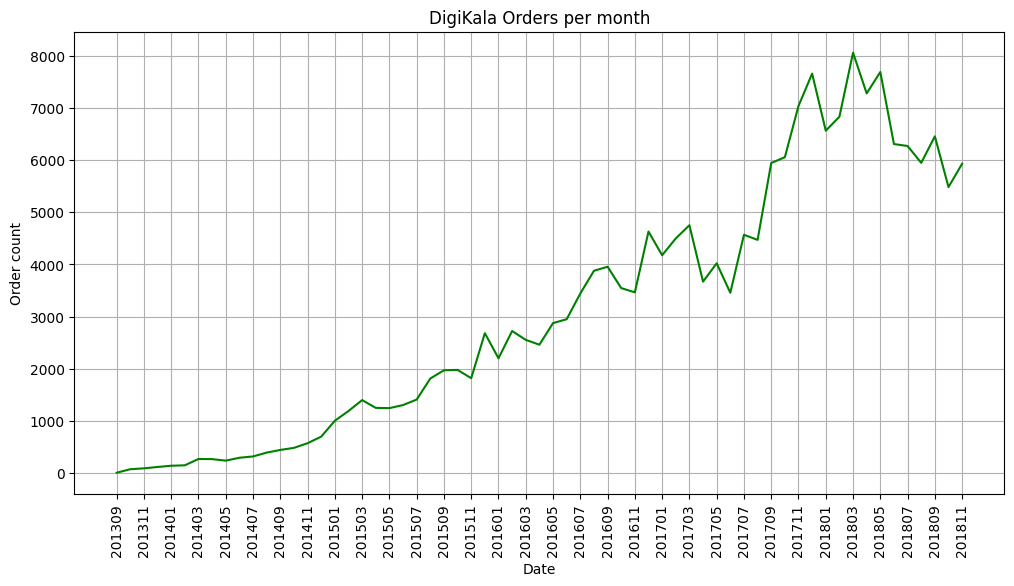

In [6]:
plt.figure(figsize=(12,6))
plt.plot(dk_order_pm['Date'].to_numpy(dtype=str),dk_order_pm['ID_Order'].to_numpy(),color='g')
plt.xlabel('Date')
plt.ylabel('Order count')
plt.xticks(rotation='vertical')
plt.title('DigiKala Orders per month')
plt.xticks(np.arange(0, len(dk_order_pm), 2))
plt.grid()
# plt.savefig('output/digikala_orders_pm.png')

#### Customer Count per city

In [80]:
dk_customer_pc = dk_data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
dk_customer_pc1 = dk_customer_pc.query('ID_Customer > 2000')
dk_customer_pc1 = dk_customer_pc1.sort_values('ID_Customer',ascending=False).reset_index()
dk_customer_pc1 = dk_customer_pc1.dropna()
dk_customer_pc1

,index,city_name_fa,ID_Customer
0,215,تهران,81048
1,815,کرج,4758
2,654,مشهد,4674
3,76,اصفهان,4664
4,97,اهواز,3353
5,505,شیراز,3076
6,355,رشت,2414
7,202,تبریز,2075


In [87]:

dk_customer_pc_other = dk_customer_pc['ID_Customer'][9:].sum()
dk_customer_pc_other = pd.DataFrame([['Other',dk_customer_pc_other]],columns=['city_name_fa', 'ID_Customer'])
dk_all = pd.concat([dk_customer_pc1, dk_customer_pc_other], ignore_index=True)


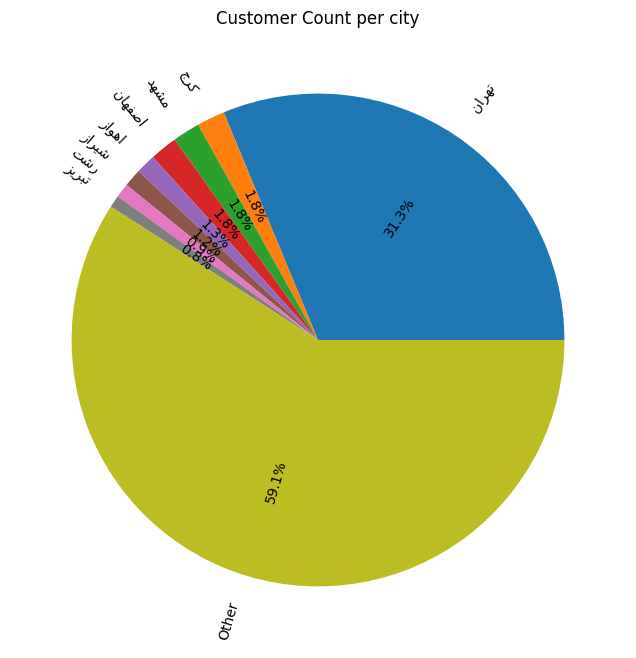

In [116]:
plt.figure(figsize=(10,8))
patches, labels, pct_texts = plt.pie(dk_all['ID_Customer'],labels=[get_display(reshape(i)) for i in dk_all['city_name_fa']],autopct='%1.1f%%',rotatelabels=True)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
plt.title('Customer Count per city')

# plt.savefig('output/customer_count_pc.png')
